# Assignment #1 AMCS 329
### Carlos Muñoz Moncayo

### Exercise #1
Code with Matlab/Python or with your favorite language a finite difference
program for solving the following one dimensional Laplace equation on a uniform
grid
\begin{equation}
\begin{cases}
-\alpha u''(x)+\beta u(x)=f(x),\quad \text{in } (a,b)\\
u(a)\,=\,u(b)\,=\,0
\end{cases}
\end{equation}


Let us first assume a uniform discretization with spacing $h$ between grid points. Then, $h$ will be given by $h=\frac{b-a}{m+1}$, where $m$ is the number of interior points. Our numerical solution will be denoted by $U$, where $U_0=u(a)=0$ and $U_{m+1}=u(b)=0$. Approximating the second derivative with a 2nd order centerd difference our discretization reads
\begin{equation}
-\alpha\left(\frac{U_{i-1}-2U_i+U_{i+1}}{h^2}\right)+\beta U_i=F_i:=f(x_i), \qquad \forall i\in\{1,..,m\}.
\end{equation}
Our numerical solution $U$ is then determined by the solution of the linear system $AU=F$, where
$A=\frac{-\alpha}{h^2}\, tridiag(1,-2,1)+\beta\, \mathrm{I}$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags

def Laplace_unif_homog(a,b,alpha,beta,f,m):
    h=(b-a)/(m+1)
    A=(-alpha/h**2)*diags([1, -2, 1], [-1, 0, 1], shape=(m, m)).toarray()
    A=A+beta*np.diag(np.ones(m))
    x=np.linspace(a,b,m+2)
    F=f(x) #No need to modify this because of homogeneous BCs
    U=np.linalg.solve(A,F[1:-1])
    return U,x

def plot_sol(U,x,U_exact,x_refined,title=""):
    plt.plot(x,U)
    plt.plot(x,U, color='blue', marker="o",label='Numerical')
    plt.plot(x_refined,U_exact, color='red', label='Exact')
    plt.legend()
    plt.title(title)
    plt.show()


To test our numerical method we consider the function $u=2x^2-\frac12 x^4$ with the source term $f(x)=-4+\frac12 x^4$, which clearly satisfy our Laplace equation for $\alpha=1$, $\beta=-3$, $a=-2$, $b=2$.

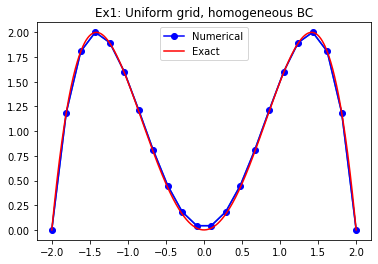

In [3]:
def test_Ex1(m):
    a=-2.
    b=2.
    f=lambda x: -4+(3./2.)*x**4
    alpha=1.
    beta=-3.
    U,x=Laplace_unif_homog(a,b,alpha,beta,f,m)
    x_refined=np.linspace(a,b,1000)
    U_exact=2*x_refined**2-0.5*x_refined**4
    U=np.concatenate(([0.],U,[.0]))
    plot_sol(U,x,U_exact,x_refined,title="Ex1: Uniform grid, homogeneous BC")

test_Ex1(20)
    

### Exercise #2
The same as in Exercise # 1 with non homogeneous boundary conditions

Since we no longer have homogeneous boundary conditions, we need to apply an small change to the first and last element of $F$ to account for the terms $U_0$ and $U_{m+1}$.

In [4]:
def Laplace_unif_non_homog(a,b,alpha,beta,f,m,ua,ub):
    h=(b-a)/(m+1)
    #A=(-alpha/h**2)*(np.diag(np.ones(m-1),1)+np.diag(np.ones(m-1),-1)-np.diag(2*np.ones(m)))+beta*np.diag(np.ones(m))    
    A=(-alpha/h**2)*diags([1, -2, 1], [-1, 0, 1], shape=(m, m)).toarray()
    A=A+beta*np.diag(np.ones(m))
    x=np.linspace(a,b,m+2)
    F=f(x) #No need to modify this because of homogeneous BCs
    F[1]=F[1]+alpha*ua/h**2
    F[-2]=F[-2]+alpha*ub/h**2
    U=np.linalg.solve(A,F[1:-1])
    return U,x

To test our numerical method we consider a translation of the function used in Exercise #1: $u=2x^2-\frac12 x^4+5$ with the source term $f(x)=-4+\frac12 x^4$-15. Our Laplace equation is again satisfied with $\alpha=1$, $\beta=-3$, $a=-2$, $b=2$.

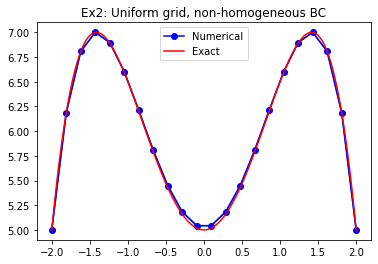

In [5]:
def test_Ex2(m):
    a=-2.
    b=2.
    f=lambda x: -4+(3./2.)*x**4-15
    alpha=1.
    beta=-3.
    ua=5
    ub=5
    U,x=Laplace_unif_non_homog(a,b,alpha,beta,f,m,ua,ub)
    x_refined=np.linspace(a,b,1000)
    U_exact=2*x_refined**2-0.5*x_refined**4+5
    U=np.concatenate(([ua],U,[ub]))
    plot_sol(U,x,U_exact,x_refined,title="Ex2: Uniform grid, non-homogeneous BC")

test_Ex2(20)

### Exercise #3
The same as in Exercise # 1 with Neumann boundary conditions.

Let us assume we have the boundary conditions $u'(a)=n_a$ and $u'(b)=n_b$, and
consider the 2nd order one-sided approximations of $u'$
\begin{align}
u'(x_0)&=\frac{-\frac32 u(x_0)+2u(x_1)-\frac12 u(x_2)}{h}+O(h^2),\\
u'(x_{m+1})&=\frac{\frac32 u(x_{m+1})+2u(x_m)-\frac12 u(x_{m-1})}{h}+O(h^2),
\end{align}
where $x_0=a$, $x_{m+1}=b$. Solving for $u_0:=u(x_0)$ and $u(x_{m+1}):=u_{m+1}$ we get
\begin{align}
u_0&\approx\frac23 \left[-h n_a+2u_1-\frac12u_2\right],\\
u_{m+1}&\approx\frac23 \left[h n_b+2u_m-\frac12u_{m-1}\right].\\
\end{align}
Thus, replacing in the first and last equations of our numerical scheme, the first and last rows of A read now
\begin{align}
\left\{\frac{2\alpha}{3h^2}+\beta, \frac{-2\alpha}{3h^2},0,0,...\right\},\\
\left\{...,0,0, -\frac{2\alpha}{3h^2},\frac{2\alpha}{3h^2}+\beta\right\}.
\end{align}
On the other hand, the first and last components of $F$ are now $f(a)-\frac{2\alpha n_a}{3h}$ and $f(b)+\frac{2\alpha n_b}{3h}$ respectively.
Finally, our solution at the inner points will be given by $U$ such that $AU=F$.



In [6]:
def Laplace_unif_Neumann(a,b,alpha,beta,f,na,nb,m):
    h=(b-a)/(m+1)
    A=(-alpha/h**2)*diags([1, -2, 1], [-1, 0, 1], shape=(m, m)).toarray()
    A=A+beta*np.diag(np.ones(m))
    (A[0][0],A[0][1])=(2*alpha/(3*h**2)+beta,-2*alpha/(3*h**2))
    (A[m-1][m-1],A[m-1][m-2])=(2*alpha/(3*h**2)+beta,-2*alpha/(3*h**2))
    x=np.linspace(a,b,m+2)
    F=f(x)
    F[1]=F[1]-2*alpha*na/(3*h)
    F[-2]=F[-2]+2*alpha*nb/(3*h)
    U=np.linalg.solve(A,F[1:-1])
    return U,x

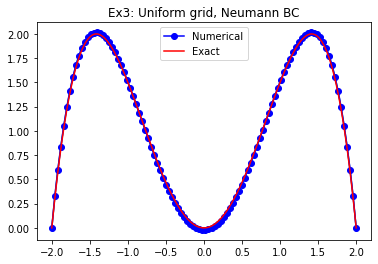

In [15]:
def test_Ex3(m):
    a=-2.
    b=2.
    f=lambda x: -4+(3./2.)*x**4
    alpha=1.
    beta=-3.
    na=4*(a)-2*(a)**3
    nb=4*(b)-2*(b)**3
    U,x=Laplace_unif_Neumann(a,b,alpha,beta,f,na,nb,m)
    x_refined=np.linspace(a,b,1000)
    U_exact=2*x_refined**2-0.5*x_refined**4
    U=np.concatenate(([0.],U,[.0]))
    plot_sol(U,x,U_exact,x_refined,title="Ex3: Uniform grid, Neumann BC")

test_Ex3(100)

### Exercise #4
The same as in Exercise # 1 or # 2 with a non uniform subdivision of the interval
$(a, b)$. Take the subdivision as an additional input.

Let us consider the homogeneous case. Since we are going to receive an arbitrary grid, we will need to use a different discretization for our derivatives. Let us denote $h_i=x_{i+1}-x_i$. Then, by applying the appropiate Taylor expansions of $u$ around $x_i$, we get that
$$
D_2 u(x_i):=\frac{2\left(u_{i+1}+\frac{h_i}{h_{i-1}}u_{i-1}-(1+\frac{h_i}{h_{i-1}})u_i\right)}
{h_i\, h_{i-1}(1+\frac{h_i}{h_{i-1}})}=u''(x_i)+O(\max\{h_i-h_{i-1},h_i h_{i-1}\}).
$$
By rewriting $D_2 u_i$ as $c_1 u_{i+1}+c_2 u_i + c_3 u_{i+1}$, with
\begin{equation}
c_1=\frac{2}{h_{i-1}^2+h_{i-1}h_{i}}, \quad 
c_2=\frac{-2}{h_{i-1}h_{i}}, \quad
c_3=\frac{2}{h_{i}^2+h_{i-1}h_{i}},
\end{equation}
our numerical solution will be again given by the solution of $AU=F$, but now using $A=-\alpha\, tridiag(c_1,c_2,c_3)+\beta\, \mathrm{I}$.


In [8]:
def Laplace_nonunif_homog(a,b,alpha,beta,f,x):
    h=[x[i]-x[i-1] for i in range(1,len(x))]
    m=len(h)-1
    A=np.zeros((m,m))
    A[0][0]=-2/(h[1]*h[0])
    A[0][1]=2/(h[1]*h[0]+h[1]**2)
    A[-1][-1]=-2/(h[m]*h[m-1])
    A[-1][-2]=2/(h[m-1]**2+h[m]*h[m-1])
    for i in range(1,m-1):
        A[i][i]=-2/(h[i+1]*h[i]) #c2
        A[i][i-1]=2/(h[i]**2+h[i+1]*h[i]) #c1
        A[i][i+1]=2/(h[i+1]*h[i]+h[i+1]**2) #c3
    A=-alpha*A+beta*np.diag(np.ones(m))
    F=f(x) #No need to modify this because of homogeneous BCs
    U=np.linalg.solve(A,F[1:-1])
    return U,x

To test our numerical method we consider the same problem as in Excercise #1, refining our grid in two regions of interest:

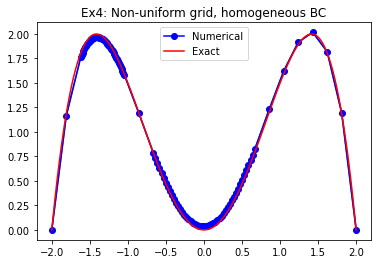

In [20]:
def test_Ex4(m):
    a=-2.
    b=2.
    f=lambda x: -4+(3./2.)*x**4
    alpha=1.
    beta=-3.
    x=np.linspace(a,b,m+2)
    rp=((2,5),(7,14)) #refinement intervals
    ref_depth=50 #number of points for each refined interval
    x_sub1=np.linspace(x[rp[0][0]],x[rp[0][1]],ref_depth)
    x_sub2=np.linspace(x[rp[1][0]],x[rp[1][1]],ref_depth)
    x=np.concatenate((x[:rp[0][0]],x_sub1,x[rp[0][1]+1:rp[1][0]],x_sub2,x[rp[1][1]+1:]))
    U,x=Laplace_nonunif_homog(a,b,alpha,beta,f,x)
    x_refined=np.linspace(a,b,1000)
    U_exact=2*x_refined**2-0.5*x_refined**4
    U=np.concatenate(([0.],U,[.0]))
    plot_sol(U,x,U_exact,x_refined,title="Ex4: Non-uniform grid, homogeneous BC")

test_Ex4(20)

### Exercise # 5
Implement a code for the solution of the Laplace equation in 2D (square domain,
uniform grid)

We would like to solve the reaction-diffusion system
\begin{equation}
\begin{cases}
-\alpha \Delta u(x,y)+\beta u(x,y)=f(x,y),\quad &\text{in } \Omega=(a,b)\times (a,b),\\
u(x,y)\,=\,g(x,y)\quad &\text{on } \partial \Omega.\\
\end{cases}
\end{equation}
We follow a procedure analogous to the described in class for the system without reaction. To include the latter, we just need to modify the coefficient matrix by adding to it a diagonal matrix: $A_{\text{reac-diff}}=A_{\text{diff}}+\beta\,\mathrm{I}$. We will consider the non-homogeneous Dirichlet problem, where the boundary values are passed to the numerical source term analogously to the 1D case.

In [95]:
from scipy.sparse import spdiags, linalg

def discrete_laplacian(h,m,alpha,beta):
    #Defining coefficient matrix
    d1=np.ones(m**2)
    d2=([1]*(m-1)+[0])*m
    d3=([0]+[1]*(m-1))*m
    A=spdiags([-4*d1,d2,d3,d1,d1],[0,-1,1,-m,m],m**2,m**2)
    A= (-alpha/h**2)*A+spdiags([beta*np.ones(m**2)],[0],m**2,m**2)
    return A

    
def Laplace_2D(a,b,alpha,beta,f,u_ex,m): 
    #Solve our Laplace problem in square (a,b)*(a,b)
    #For simplicity this requires the exact solution to set the boundary conditions
    #But can be modified to require just the necessary
    h=(b-a)/(m+1)
    x=np.linspace(a,b,m+2); x=x[1:-1]
    y=np.linspace(a,b,m+2); y=y[1:-1]
    X,Y=np.meshgrid(x,y)
    A=discrete_laplacian(h,m,alpha,beta).tocsr()
    F=f(X,Y)
    #Setting BC using exact solution
    F[0]+= +(alpha/h**2)*u_ex(x,a)
    F[m-1]+= +(alpha/h**2)*u_ex(x,b)
    F[:,0]+= +(alpha/h**2)*u_ex(y,a)
    F[:,m-1]+= +(alpha/h**2)*u_ex(y,b)
    F=F.reshape([m**2])
    U=linalg.spsolve(A,F)
    return U,(X,Y)




We test our problem for the function $u(x,y)=2\left(x^2+y^2\right)-\frac12\left(x^4+y^4\right)$ with $a=-2$, $b=2$, which satisfies our equation for any $\alpha$, $\beta$, by setting $f=-\alpha \Delta u+\beta u$.

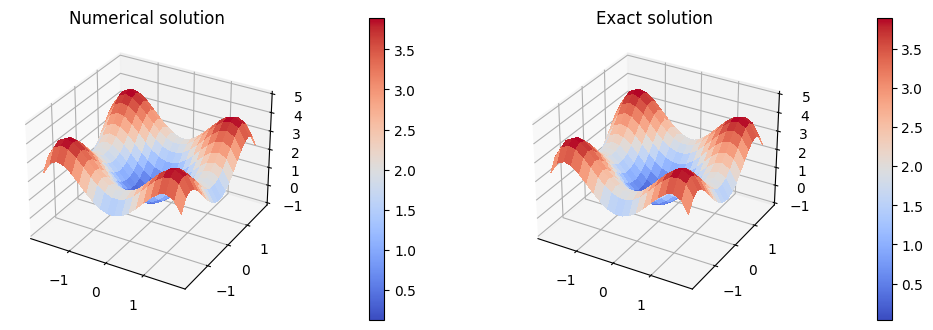

In [99]:
def Test_Ex5(m):
    a=-2.
    b=2.
    alpha=1.
    beta=-3.
    
    u_ex=lambda x,y: 2*(x**2+y**2)-0.5*(x**4+y**4) #x**2+y**2#
    lap_u_ex=lambda x,y: 8.-6*(x**2+y**2) #4.*(x/x)#
    f=lambda x,y: -alpha*lap_u_ex(x,y)+beta*u_ex(x,y)

    U,(X,Y)=Laplace_2D(a,b,alpha,beta,f,u_ex,m)
    U_exact=u_ex(X,Y)
    U=U.reshape([m,m])
    
    #Plotting results

    #---- First subplot
    from mpl_toolkits.mplot3d.axes3d import Axes3D
    from matplotlib import cm
    from matplotlib.ticker import LinearLocator
    fig = plt.figure(figsize=(12,8), dpi= 100)
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.set_title("Numerical solution")
    surf = ax.plot_surface(X, Y, U, rstride=1, cstride=1, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    ax.set_zlim3d(-1., 5.)
    fig.colorbar(surf, shrink=0.5, aspect=20, pad=0.2)

    #---- Second subplot
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.set_title("Exact solution")
    surf = ax.plot_surface(X, Y, U_exact, rstride=1, cstride=1, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    ax.set_zlim3d(-1., 5.)
    fig.colorbar(surf, shrink=0.5, aspect=20, pad=0.2)

    plt.show()

Test_Ex5(20) 
